### Task 5.2
* Name:LI WAN
* Student Number:223718804
* E-mail:s223718804@deakin.edu.au
* Course:SIT720
---

In [52]:
# 224 for train and 88 for test
import pandas as pd
train_path = r'E:\2-学习\1-Deakin\24-T1\SIT720\Task\D_TaskData\cirrhosis_train.csv'
# Choose the first 224 patients as training data
#train_data = filtered_df.iloc[:224, :]
train_data=pd.read_csv(train_path, comment='#')
train_data=train_data.drop(columns=['trainID', 'N_Days'])

# The left 88 patients as test data
test_path = r'E:\2-学习\1-Deakin\24-T1\SIT720\Task\D_TaskData\crrrhosis_test.csv'
test_data = pd.read_csv(test_path, comment='#')
test_data=test_data.drop(columns=['N_Days'])

# Print
print("Training dataset size:", train_data.shape)
print("Test dataset size:", test_data.shape)


Training dataset size: (224, 18)
Test dataset size: (88, 19)


In [53]:
print("Training Data Feature Types:")
print(train_data.dtypes)

print("\nTest Data Feature Types:")
print(test_data.dtypes)

Training Data Feature Types:
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

Test Data Feature Types:
testID             int64
Status           float64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper             int64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype:

In [54]:
# Check missing value of train data 
missing_train = train_data.isnull().sum()
print("Missing values in training data:")
print(missing_train[missing_train > 0])

# Check missing value of test data
missing_test = test_data.isnull().sum()
print("\nMissing values in test data:")
print(missing_test[missing_test > 0])

Missing values in training data:
Cholesterol      23
Copper            2
Tryglicerides    24
Platelets         3
dtype: int64

Missing values in test data:
Status           88
Cholesterol       5
Tryglicerides     6
Platelets         1
dtype: int64


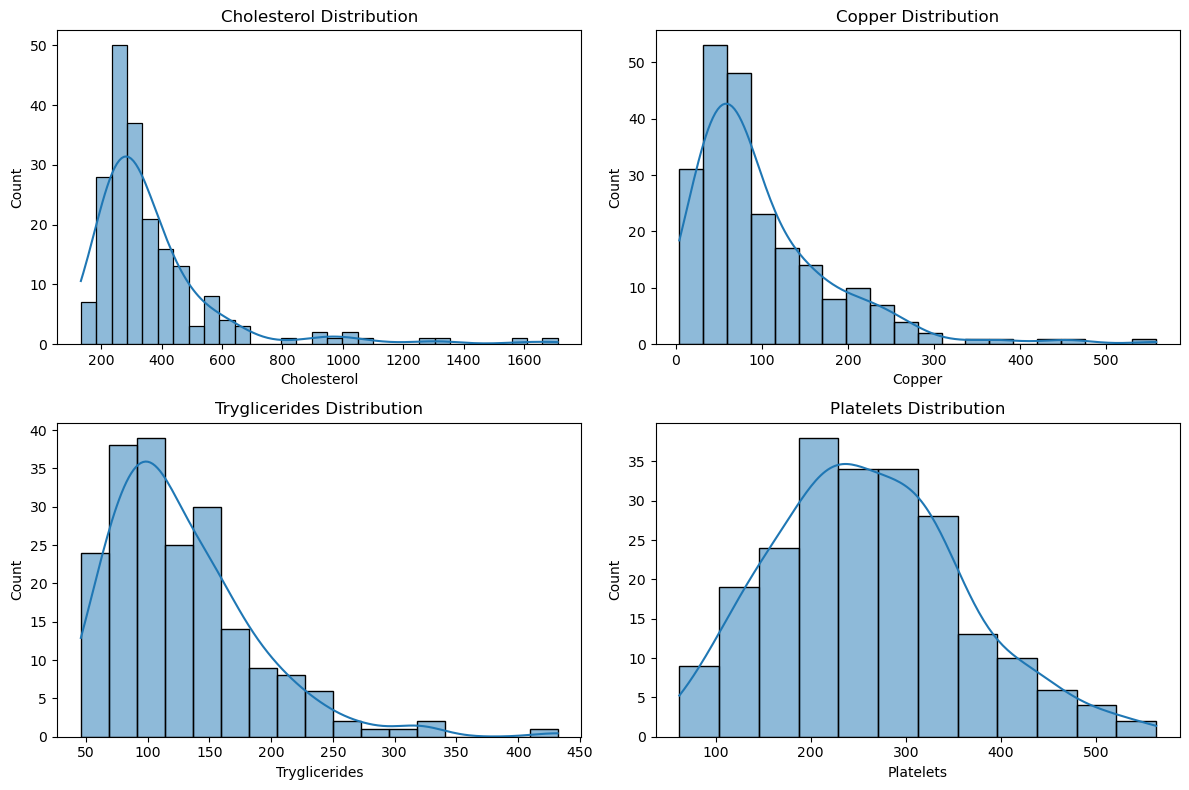

In [55]:
# Show the distribution of train data and test data and find proper way to impune missing value
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each column
plt.figure(figsize=(12, 8))

# Plot Cholesterol distribution
plt.subplot(2, 2, 1)
sns.histplot(train_data['Cholesterol'], kde=True)
plt.title('Cholesterol Distribution')

# Plot Copper distribution
plt.subplot(2, 2, 2)
sns.histplot(train_data['Copper'], kde=True)
plt.title('Copper Distribution')

# Plot Tryglicerides distribution
plt.subplot(2, 2, 3)
sns.histplot(train_data['Tryglicerides'], kde=True)
plt.title('Tryglicerides Distribution')

# Plot Platelets distribution
plt.subplot(2, 2, 4)
sns.histplot(train_data['Platelets'], kde=True)
plt.title('Platelets Distribution')

plt.tight_layout()
plt.show()

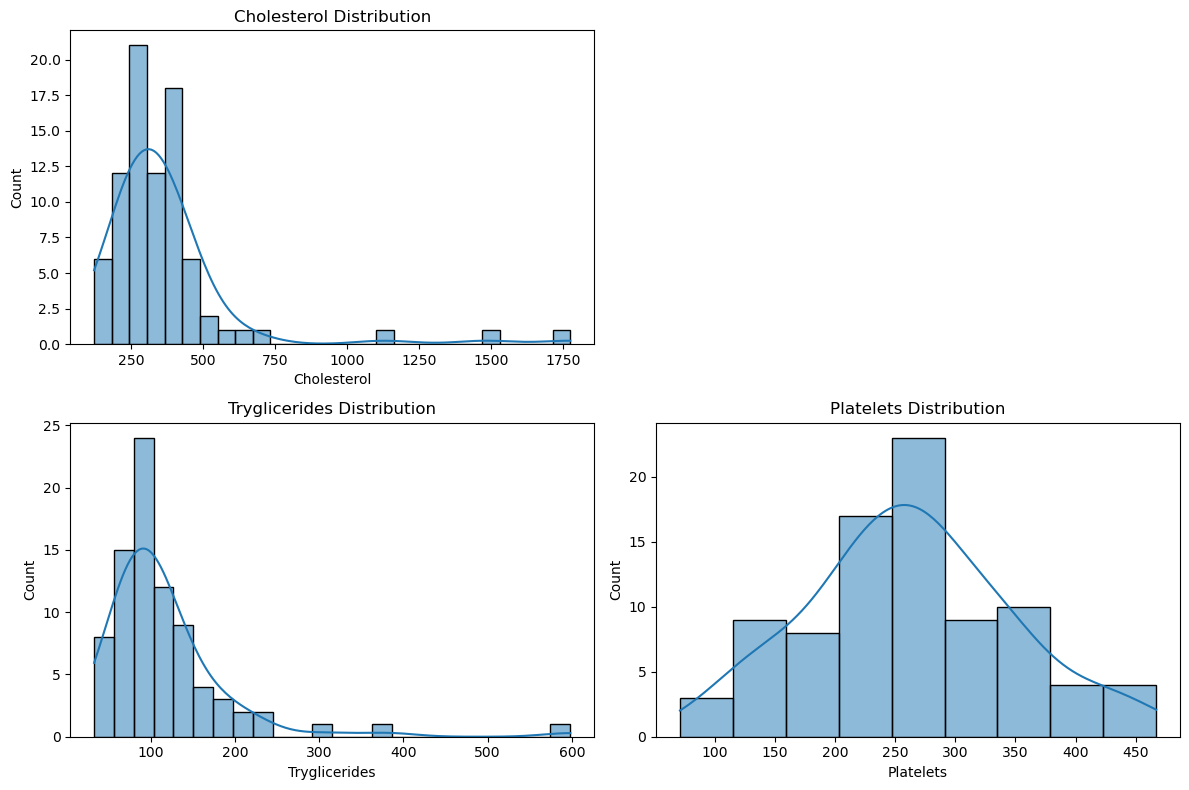

In [56]:
# Plot histograms for each column
plt.figure(figsize=(12, 8))

# Plot Cholesterol distribution
plt.subplot(2, 2, 1)
sns.histplot(test_data['Cholesterol'], kde=True)
plt.title('Cholesterol Distribution')

# Plot Tryglicerides distribution
plt.subplot(2, 2, 3)
sns.histplot(test_data['Tryglicerides'], kde=True)
plt.title('Tryglicerides Distribution')

# Plot Platelets distribution
plt.subplot(2, 2, 4)
sns.histplot(test_data['Platelets'], kde=True)
plt.title('Platelets Distribution')

plt.tight_layout()
plt.show()

In [57]:
# Train data: According to the distribution graph, for Cholesterol', 'Copper', 'Tryglicerides', they are skewd, so use median for, for 'Platelets', it is more similar to normal distribution, use mean.
# Impute missing values for 'Cholesterol', 'Copper', and 'Tryglicerides' using median
median_imputation_cols = ['Cholesterol', 'Copper', 'Tryglicerides']
train_data[median_imputation_cols] = train_data[median_imputation_cols].fillna(train_data[median_imputation_cols].median())

# Impute missing values for 'Platelets' using mean
mean_imputation_cols = ['Platelets']
train_data[mean_imputation_cols] = train_data[mean_imputation_cols].fillna(train_data[mean_imputation_cols].mean())
train_data

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D,Placebo,24803,M,Y,Y,N,Y,1.3,151.0,3.08,73.0,1112.0,46.50,49.0,213.0,13.2,4
1,D,Placebo,18199,F,N,Y,Y,S,6.6,244.0,3.41,199.0,1819.0,170.50,91.0,132.0,12.1,3
2,CL,Placebo,17874,F,N,Y,N,S,8.7,310.0,3.89,107.0,637.0,117.00,242.0,298.0,9.6,2
3,D,D-penicillamine,19577,F,Y,Y,Y,N,1.2,269.0,3.12,75.0,1441.0,165.85,68.0,166.0,11.1,4
4,D,Placebo,21483,F,N,Y,Y,N,3.2,260.0,3.19,91.0,815.0,127.10,101.0,160.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,C,D-penicillamine,10550,F,N,N,N,N,1.0,239.0,3.77,77.0,1877.0,97.65,101.0,312.0,10.2,1
220,D,D-penicillamine,25546,M,N,Y,N,N,2.3,586.0,3.01,243.0,2276.0,114.70,126.0,339.0,10.9,3
221,D,D-penicillamine,23107,F,N,Y,Y,N,14.4,448.0,3.65,34.0,1218.0,60.45,318.0,385.0,11.7,4
222,C,Placebo,11868,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,3


In [58]:
# Test data: Impute missing values for 'Cholesterol', and 'Tryglicerides' using median
median_imputation_cols = ['Cholesterol', 'Tryglicerides']
test_data[median_imputation_cols] = test_data[median_imputation_cols].fillna(test_data[median_imputation_cols].median())

# Impute missing values for 'Platelets' using mean
test_data['Platelets'] = test_data['Platelets'].fillna(test_data['Platelets'].mean())
test_data

,testID,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,NaN,D-penicillamine,18393,F,N,N,N,N,0.4,127.0,3.50,14,1062.0,49.60,84.0,334.0,10.3,2
1,2,NaN,D-penicillamine,24020,M,N,N,N,N,1.8,416.0,3.94,121,10165.0,79.98,219.0,213.0,11.0,3
2,3,NaN,Placebo,23445,M,N,Y,Y,N,0.6,252.0,3.83,41,843.0,65.10,83.0,336.0,11.4,4
3,4,NaN,D-penicillamine,23241,F,N,N,Y,N,3.8,426.0,3.22,96,2716.0,210.80,113.0,228.0,10.6,2
4,5,NaN,Placebo,16839,F,N,Y,N,N,2.9,332.0,3.60,86,1492.0,134.85,103.0,277.0,11.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,NaN,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39,1713.0,171.00,100.0,234.0,10.2,2
84,85,NaN,D-penicillamine,16216,F,N,N,N,N,1.5,293.0,4.30,50,975.0,125.55,56.0,336.0,9.1,2
85,86,NaN,D-penicillamine,19237,F,N,N,N,N,0.5,316.0,4.52,31,784.0,74.40,97.5,361.0,10.1,3
86,87,NaN,D-penicillamine,14558,F,N,Y,Y,N,3.1,227.0,3.75,121,1136.0,110.00,91.0,264.0,10.0,3


Label Distribution:
Status
C     119
D      93
CL     12
Name: count, dtype: int64


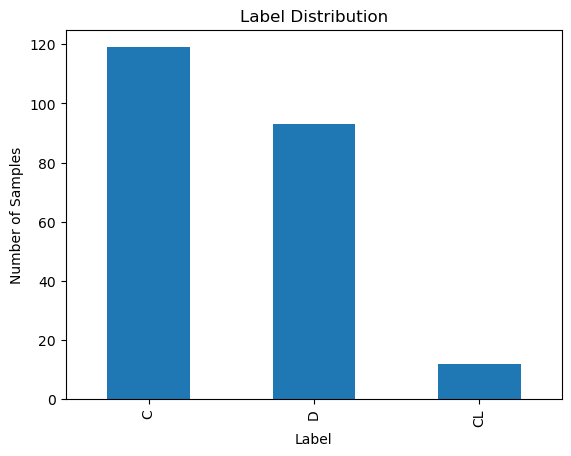

In [59]:
import matplotlib.pyplot as plt

label_distribution = train_data['Status'].value_counts()

# Print distribution
print("Label Distribution:")
print(label_distribution)

# Draw bar graph
label_distribution.plot(kind='bar', title='Label Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.show()

In [60]:
# Encode categorical features
categorical_features = ['Status', 'Drug','Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin']
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for feature in categorical_features:
    train_data.loc[:, feature] = encoder.fit_transform(train_data[feature])

train_data

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,1,24803,1,1,1,0,2,10.0,151.0,3.08,73.0,1112.0,46.50,49.0,213.0,13.2,4
1,2,1,18199,0,0,1,1,1,48.0,244.0,3.41,199.0,1819.0,170.50,91.0,132.0,12.1,3
2,1,1,17874,0,0,1,0,1,55.0,310.0,3.89,107.0,637.0,117.00,242.0,298.0,9.6,2
3,2,0,19577,0,1,1,1,0,9.0,269.0,3.12,75.0,1441.0,165.85,68.0,166.0,11.1,4
4,2,1,21483,0,0,1,1,0,27.0,260.0,3.19,91.0,815.0,127.10,101.0,160.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,0,10550,0,0,0,0,0,7.0,239.0,3.77,77.0,1877.0,97.65,101.0,312.0,10.2,1
220,2,0,25546,1,0,1,0,0,19.0,586.0,3.01,243.0,2276.0,114.70,126.0,339.0,10.9,3
221,2,0,23107,0,0,1,1,0,63.0,448.0,3.65,34.0,1218.0,60.45,318.0,385.0,11.7,4
222,0,1,11868,0,0,0,0,0,2.0,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,3


In [61]:
categorical_features = ['Drug','Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin']
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for feature in categorical_features:
    test_data.loc[:, feature] = encoder.fit_transform(test_data[feature])

test_data

,testID,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,NaN,0,18393,0,0,0,0,0,1.0,127.0,3.50,14,1062.0,49.60,84.0,334.0,10.3,2
1,2,NaN,0,24020,1,0,0,0,0,15.0,416.0,3.94,121,10165.0,79.98,219.0,213.0,11.0,3
2,3,NaN,1,23445,1,0,1,1,0,3.0,252.0,3.83,41,843.0,65.10,83.0,336.0,11.4,4
3,4,NaN,0,23241,0,0,0,1,0,31.0,426.0,3.22,96,2716.0,210.80,113.0,228.0,10.6,2
4,5,NaN,1,16839,0,0,1,0,0,22.0,332.0,3.60,86,1492.0,134.85,103.0,277.0,11.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,NaN,0,22767,0,0,0,0,0,14.0,434.0,3.35,39,1713.0,171.00,100.0,234.0,10.2,2
84,85,NaN,0,16216,0,0,0,0,0,12.0,293.0,4.30,50,975.0,125.55,56.0,336.0,9.1,2
85,86,NaN,0,19237,0,0,0,0,0,2.0,316.0,4.52,31,784.0,74.40,97.5,361.0,10.1,3
86,87,NaN,0,14558,0,0,1,1,0,24.0,227.0,3.75,121,1136.0,110.00,91.0,264.0,10.0,3


In [62]:
# Calculate mean and standard deviation for each column excluding 'Status'
mean_vals = train_data.drop('Status', axis=1).mean()
std_vals = train_data.drop('Status', axis=1).std()

# Standardize each column using z-score normalization, excluding 'Status'
standardized_train = (train_data.drop('Status', axis=1) - mean_vals) / std_vals

# Add back the 'Status' column to the standardized dataframe
standardized_train['Status'] = train_data['Status']
standardized_train

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0.962745,1.717075,2.69513,3.102179,0.912323,-0.631042,2.980322,-0.524894,-0.986972,-0.985827,-0.325105,-0.450831,-1.417048,-1.387235,-0.494135,2.322675,1.022042,2
1,0.962745,0.019199,-0.369383,-0.320915,0.912323,1.577606,1.272925,1.371496,-0.557203,-0.21059,1.184315,-0.1493,0.843419,-0.633924,-1.313165,1.264023,-0.089305,2
2,0.962745,-0.064358,-0.369383,-0.320915,0.912323,-0.631042,1.272925,1.720831,-0.252205,0.917029,0.082199,-0.653417,-0.131863,2.074407,0.36534,-1.142003,-1.200651,1
3,-1.03406,0.37348,-0.369383,3.102179,0.912323,1.577606,-0.434471,-0.574799,-0.441673,-0.891859,-0.301146,-0.310515,0.758651,-1.046452,-0.969375,0.301613,1.022042,2
4,0.962745,0.863509,-0.369383,-0.320915,0.912323,1.577606,-0.434471,0.323491,-0.483264,-0.727415,-0.109474,-0.5775,0.052255,-0.454565,-1.030044,1.167782,1.022042,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,-1.03406,-1.947346,-0.369383,-0.320915,-1.09121,-0.631042,-0.434471,-0.674609,-0.580309,0.635125,-0.277187,-0.124563,-0.484605,-0.454565,0.506901,-0.564557,-2.311997,0
220,-1.03406,1.908099,2.69513,-0.320915,0.912323,-0.631042,-0.434471,-0.075749,1.02324,-1.150272,1.711415,0.045609,-0.173791,-0.006165,0.77991,0.10913,-0.089305,2
221,-1.03406,1.281037,-0.369383,-0.320915,0.912323,1.577606,-0.434471,2.120071,0.385518,0.35322,-0.792307,-0.405623,-1.162745,3.437541,1.245038,0.879059,1.022042,2
222,0.962745,-1.60849,-0.369383,-0.320915,-1.09121,-0.631042,-0.434471,-0.924134,-0.205993,0.094807,-0.588655,-0.394961,-0.032512,-0.83122,-0.372798,-0.757039,-0.089305,0


In [63]:
# Calculate mean and standard deviation for each column excluding 'Status'
mean_vals = test_data.drop('Status', axis=1).mean()
std_vals = test_data.drop('Status', axis=1).std()

# Standardize each column using z-score normalization, excluding 'Status'
standardized_test = (test_data.drop('Status', axis=1)- mean_vals) / std_vals

#Add back the 'Status' column to the standardized dataframe
standardized_test['Status'] = test_data['Status']
standardized_test=standardized_test.drop('testID', axis=1)
standardized_test


,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,-0.866812,-0.064728,-0.335603,-0.186797,-0.866812,-0.643886,-0.314426,-1.103522,-0.996821,-0.178424,-0.852203,-0.318043,-1.12117,-0.419231,0.848127,-0.301548,-1.120451,NaN
1,-0.866812,1.416879,2.94585,-0.186797,-0.866812,-0.643886,-0.314426,-0.003571,0.224097,0.914706,0.335182,6.170875,-0.625283,1.363326,-0.579248,0.47893,0.112045,NaN
2,1.140543,1.26548,2.94585,-0.186797,1.140543,1.535421,-0.314426,-0.946386,-0.468742,0.641424,-0.552583,-0.474154,-0.868166,-0.432435,0.87172,0.924917,1.344542,NaN
3,-0.866812,1.211766,-0.335603,-0.186797,-0.866812,1.535421,-0.314426,1.253516,0.266344,-0.874053,0.057755,0.860982,1.510068,-0.036311,-0.402301,0.032942,-1.120451,NaN
4,1.140543,-0.473901,-0.335603,-0.186797,1.140543,-0.643886,-0.314426,0.546404,-0.130772,0.070015,-0.053215,-0.011525,0.27035,-0.168353,0.175727,0.47893,1.344542,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,-0.866812,1.08696,-0.335603,-0.186797,-0.866812,-0.643886,-0.314426,-0.082139,0.300141,-0.551082,-0.574777,0.146011,0.86042,-0.207965,-0.331522,-0.413045,-1.120451,NaN
84,-0.866812,-0.637939,-0.335603,-0.186797,-0.866812,-0.643886,-0.314426,-0.239275,-0.295532,1.809085,-0.452709,-0.38006,0.118548,-0.788947,0.87172,-1.639511,-1.120451,NaN
85,-0.866812,0.1575,-0.335603,-0.186797,-0.866812,-0.643886,-0.314426,-1.024954,-0.198366,2.355651,-0.663553,-0.516211,-0.716364,-0.240975,1.166632,-0.524542,0.112045,NaN
86,-0.866812,-1.074495,-0.335603,-0.186797,1.140543,1.535421,-0.314426,0.70354,-0.574358,0.442673,0.335182,-0.265294,-0.135272,-0.326802,0.022373,-0.636039,0.112045,NaN


In [64]:
# Double Check 
standardized_train.isnull().sum()

Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [65]:
standardized_test.isnull().sum()

Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol       0
Albumin           0
Copper            0
Alk_Phos          0
SGOT              0
Tryglicerides     0
Platelets         0
Prothrombin       0
Stage             0
Status           88
dtype: int64

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score,accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# Extract features and target variable from the pre-processed training dataset
X = standardized_train.drop('Status', axis=1)
y= standardized_train['Status'].astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [67]:
from sklearn.feature_selection import mutual_info_classif

# Combine X_train_resampled and y_train_resampled into one DataFrame
train_data = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), pd.DataFrame(y_train_resampled, columns=['Status'])], axis=1)

# Calculate Pearson correlation coefficients
correlation = train_data.corr()

# Extract correlation with the target variable in the original order
corr_with_target = correlation.loc['Status', X.columns].round(3)
print("\nCorrelation with Target Variable:")
for feature, corr in zip(X.columns, corr_with_target):
    print(f"{feature}: {corr:.3f}")
# Calculate mutual information between each feature and the target variable
mutual_info = mutual_info_classif(X_train_resampled, y_train_resampled)

# Create a DataFrame to store feature names and mutual information scores
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})

# Display feature names and their corresponding mutual information scores
print("\nMutual Information with Target Variable:")
for feature, mi in zip(X.columns, mutual_info):
    print(f"{feature}: {mi:.3f}")  


Correlation with Target Variable:
Drug: 0.069
Age: 0.182
Sex: 0.098
Ascites: 0.293
Hepatomegaly: 0.262
Spiders: 0.227
Edema: 0.296
Bilirubin: 0.483
Cholesterol: 0.112
Albumin: -0.271
Copper: 0.269
Alk_Phos: 0.162
SGOT: 0.357
Tryglicerides: 0.160
Platelets: -0.105
Prothrombin: 0.344
Stage: 0.279

Mutual Information with Target Variable:
Drug: 0.006
Age: 0.496
Sex: 0.000
Ascites: 0.102
Hepatomegaly: 0.085
Spiders: 0.095
Edema: 0.065
Bilirubin: 0.578
Cholesterol: 0.551
Albumin: 0.474
Copper: 0.532
Alk_Phos: 0.544
SGOT: 0.515
Tryglicerides: 0.401
Platelets: 0.454
Prothrombin: 0.301
Stage: 0.043


In [68]:
# Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'class_weight': ['balanced','balanced_subsample']
}

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1_weighted', n_jobs=-1)
rf_grid.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_rf_model = rf_grid.best_estimator_


# Evaluate performance on training set
y_train_pred = best_rf_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy on Training Data:", train_accuracy)

# Evaluate performance on test set
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Data:", round(test_accuracy,2))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.76
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.00      0.00      0.00         2
           2       0.69      0.95      0.80        19

    accuracy                           0.76        45
   macro avg       0.51      0.54      0.51        45
weighted avg       0.74      0.76      0.73        45



C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Display feature importance
feature_importance = best_rf_model.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X_train_resampled.columns, feature_importance):
    print(f"{feature}: {importance:.3f}")

Feature Importance:
Drug: 0.012
Age: 0.116
Sex: 0.008
Ascites: 0.011
Hepatomegaly: 0.012
Spiders: 0.013
Edema: 0.009
Bilirubin: 0.156
Cholesterol: 0.076
Albumin: 0.055
Copper: 0.105
Alk_Phos: 0.067
SGOT: 0.100
Tryglicerides: 0.050
Platelets: 0.070
Prothrombin: 0.118
Stage: 0.023


In [70]:
# Gradient Boosting
# Define Gradient Boosting hyperparameters
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Create Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='f1_weighted', n_jobs=-1)
gb_grid.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_gb_model = gb_grid.best_estimator_

# Evaluate performance on training set
y_train_pred = best_rf_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy on Training Data:", train_accuracy)

# Evaluate performance on test set
y_test_pred = best_gb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Data:", round(test_accuracy, 2))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_test_pred))


Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.78
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        24
           1       0.00      0.00      0.00         2
           2       0.69      0.95      0.80        19

    accuracy                           0.78        45
   macro avg       0.53      0.55      0.53        45
weighted avg       0.77      0.78      0.76        45



C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
# Display feature importance
feature_importance = best_gb_model.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X_train_resampled.columns, feature_importance):
    print(f"{feature}: {importance:.3f}")

Feature Importance:
Drug: 0.002
Age: 0.175
Sex: 0.002
Ascites: 0.012
Hepatomegaly: 0.001
Spiders: 0.003
Edema: 0.001
Bilirubin: 0.256
Cholesterol: 0.037
Albumin: 0.060
Copper: 0.028
Alk_Phos: 0.064
SGOT: 0.090
Tryglicerides: 0.021
Platelets: 0.060
Prothrombin: 0.157
Stage: 0.031


In [72]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

# Create SVM model
svm_model = OneVsRestClassifier(SVC(kernel='rbf', probability=True))

# Train the SVM model
svm_model.fit(X_train_resampled, y_train_resampled)

# Fit the model to the resampled training data
svm_model.fit(X_train_resampled, y_train_resampled)

# Evaluate performance on training set
y_train_pred = svm_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy on Training Data:", train_accuracy)

# Evaluate performance on test set
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Data:", round(test_accuracy, 2))

print("SVM Classification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy on Training Data: 0.9192982456140351
Accuracy on Test Data: 0.76
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.00      0.00      0.00         2
           2       0.73      0.84      0.78        19

    accuracy                           0.76        45
   macro avg       0.54      0.53      0.53        45
weighted avg       0.79      0.76      0.77        45



In [73]:
# Calculate permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# Display feature importance
feature_importance = perm_importance.importances_mean
print("Feature Importance:")
for feature, importance in zip(X_train_resampled, feature_importance):
    print(f"{feature}: {importance:.3f}")

Feature Importance:
Drug: -0.007
Age: 0.009
Sex: -0.007
Ascites: 0.029
Hepatomegaly: 0.011
Spiders: 0.044
Edema: 0.009
Bilirubin: 0.078
Cholesterol: 0.047
Albumin: 0.047
Copper: 0.029
Alk_Phos: 0.027
SGOT: 0.007
Tryglicerides: -0.009
Platelets: 0.011
Prothrombin: -0.000
Stage: 0.016


In [27]:
# Choose best model and predict standardized test data
X_test=standardized_test.drop('Status',axis=1)
y_test_pred = best_gb_model.predict(X_test)

# Fill the predicted results back into the 'Status' column of the original test dataset.
test_data['Status'] = y_test_pred

# Extract testID and Predicted 'Status'
predictions = test_data[['testID', 'Status']]
# 0-C，1-CL，2-D
reverse_mapping = {0: 'C', 1: 'CL', 2: 'D'}
predictions.loc[:, 'Status'] = predictions['Status'].map(reverse_mapping)
predictions

,testID,Status
0,1,C
1,2,D
2,3,C
3,4,D
4,5,D
...,...,...
83,84,C
84,85,C
85,86,C
86,87,CL


In [28]:
save_path = 'E:\\2-学习\\1-Deakin\\24-T1\\SIT720\\Task\\D_TaskData\\predictions.csv'
# Save prediction as CSV file
predictions.to_csv(save_path, index=False)